In [1]:
import pandas as pd
import os

In [2]:
dir = '../../data/SPX_Data/'
                
                #  'Dates', 
                #  'Year', 
                #  'symbol',
                #  'gics_sector_name',
                #  'PX_LAST'


csv_files = [    
                 'DATE_OF_LAST_EXECUTIVE_CHANGE',
                 'TOT_STK_AWD_GIVEN_TO_CEO_EQUIV',
                 'TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV',
                 'TOT_BONUSES_PAID_TO_CEO_EQUIV',
                 'TOT_N_EQT_INCENT_GVN_TO_CEO_EQ',
                 'COMP_LKD_LAST_CEO_&_EQUIV_CHG_D',
                 'ALL_OTHER_COMP_AW_TO_CEO_EQUIV']

# csv_files = [f for f in os.listdir(dir) if f.endswith('.csv')]

In [3]:
merged_df = None

for file in csv_files:
    file_path = os.path.join(dir, file+".csv")
    df = pd.read_csv(file_path)
    df["Date"] =  pd.to_datetime(df["Date"])
    file_name = os.path.splitext(file)[0]
    melted_df = pd.melt(df, id_vars=["Date"], var_name="symbol", value_name=file_name)
    
    if merged_df is None:
            merged_df = melted_df
    else:
        merged_df = pd.merge(merged_df, melted_df, on=["Date", "symbol"], how="outer")


merged_df.to_csv("merged_data.csv", index=False)

In [4]:
# Data = pd.read_csv(dir+"/ALL_OTHER_COMP_AW_TO_CEO_EQUIV.csv")

In [5]:
# Data2 = pd.melt(Data, id_vars=['Date'], var_name='symbol', value_name='ALL_OTHER_COMP_AW_TO_CEO_EQUIV')

In [6]:
# print(Data2["Date"])

plot sample charts

In [7]:
PX_last_data = pd.read_csv("../../data/503PXlast.csv")
PX_last_data["DATES"] =  pd.to_datetime(PX_last_data["DATES"])
PX_last_data_melt = pd.melt(PX_last_data,id_vars=['DATES'], var_name='symbol',value_name="PX_last")


In [8]:
#list of stock in the SPX
print(PX_last_data_melt["symbol"].unique())

['LYB UN Equity' 'AXP UN Equity' 'VZ UN Equity' 'TPL UN Equity'
 'AVGO UW Equity' 'BA UN Equity' 'SOLV UN Equity' 'CAT UN Equity'
 'JPM UN Equity' 'CVX UN Equity' 'KO UN Equity' 'ABBV UN Equity'
 'DIS UN Equity' 'CPAY UN Equity' 'EXR UN Equity' 'XOM UN Equity'
 'PSX UN Equity' 'GE UN Equity' 'HPQ UN Equity' 'HD UN Equity'
 'MPWR UW Equity' 'IBM UN Equity' 'JNJ UN Equity' 'LULU UW Equity'
 'MCD UN Equity' 'MRK UN Equity' 'MMM UN Equity' 'AWK UN Equity'
 'BAC UN Equity' 'PFE UN Equity' 'PG UN Equity' 'T UN Equity'
 'TRV UN Equity' 'RTX UN Equity' 'ADI UW Equity' 'WMT UN Equity'
 'CSCO UW Equity' 'INTC UW Equity' 'GM UN Equity' 'MSFT UW Equity'
 'DG UN Equity' 'CI UN Equity' 'KMI UN Equity' 'C UN Equity'
 'AIG UN Equity' 'MO UN Equity' 'HCA UN Equity' 'IP UN Equity'
 'HPE UN Equity' 'ABT UN Equity' 'AFL UN Equity' 'APD UN Equity'
 'SMCI UW Equity' 'RCL UN Equity' 'HES UN Equity' 'LII UN Equity'
 'ADM UN Equity' 'ADP UW Equity' 'VRSK UW Equity' 'AZO UN Equity'
 'LIN UW Equity' 'AVY UN Equi

<Axes: xlabel='DATES', ylabel='PX_last'>

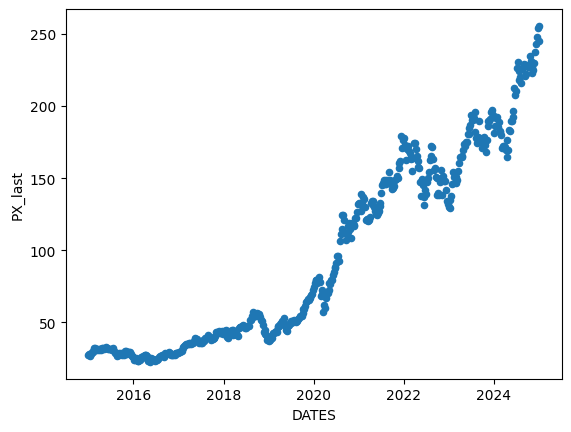

In [9]:
PX_last_data_melt[PX_last_data_melt["symbol"]=="AAPL UW Equity"].plot(kind="scatter",x="DATES",y="PX_last")

In [10]:
display(PX_last_data_melt)

,DATES,symbol,PX_last
0,2015-01-02,LYB UN Equity,80.070000
1,2015-01-09,LYB UN Equity,78.980000
2,2015-01-16,LYB UN Equity,79.840000
3,2015-01-23,LYB UN Equity,80.800000
4,2015-01-30,LYB UN Equity,79.090000
...,...,...,...
263064,2024-12-06,MOH UN Equity,294.990000
263065,2024-12-13,MOH UN Equity,303.020000
263066,2024-12-20,MOH UN Equity,294.730000
263067,2024-12-27,MOH UN Equity,292.180000


In [18]:
# merged_df = pd.merge(merged_df, melted_df, on=["Date", "symbol"], how="outer")
# PX_last_data_melt

merged_df.info()

merged_df['Year'] = merged_df['Date'].dt.year
PX_last_data_melt['Year'] = PX_last_data_melt['DATES'].dt.year

display(merged_df)

final_merge = pd.merge(PX_last_data_melt, merged_df, on=['Year', 'symbol'], how='left')

display(final_merge)
final_merge.to_csv('final_merge.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             5030 non-null   datetime64[ns]
 1   symbol                           5030 non-null   object        
 2   DATE_OF_LAST_EXECUTIVE_CHANGE    4897 non-null   float64       
 3   TOT_STK_AWD_GIVEN_TO_CEO_EQUIV   4872 non-null   float64       
 4   TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV   4816 non-null   float64       
 5   TOT_BONUSES_PAID_TO_CEO_EQUIV    4813 non-null   float64       
 6   TOT_N_EQT_INCENT_GVN_TO_CEO_EQ   4853 non-null   float64       
 7   COMP_LKD_LAST_CEO_&_EQUIV_CHG_D  4877 non-null   float64       
 8   ALL_OTHER_COMP_AW_TO_CEO_EQUIV   4879 non-null   float64       
 9   Year                             5030 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1), object(1)
memory

,Date,symbol,DATE_OF_LAST_EXECUTIVE_CHANGE,TOT_STK_AWD_GIVEN_TO_CEO_EQUIV,TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV,TOT_BONUSES_PAID_TO_CEO_EQUIV,TOT_N_EQT_INCENT_GVN_TO_CEO_EQ,COMP_LKD_LAST_CEO_&_EQUIV_CHG_D,ALL_OTHER_COMP_AW_TO_CEO_EQUIV,Year
0,2014-12-31,A UN Equity,20140917.0,6632830.0,4569033.0,0.0,1631089.0,20050301.0,11233644.0,2014
1,2014-12-31,AAPL UW Equity,20140529.0,0.0,0.0,0.0,6700000.0,20110101.0,774176.0,2014
2,2014-12-31,ABBV UN Equity,20140515.0,8379403.0,2762525.0,NaN,3500000.0,20130101.0,16910310.0,2014
3,2014-12-31,ABNB UW Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4,2014-12-31,ABT UN Equity,20121231.0,4649999.0,4649997.0,0.0,3800000.0,19990101.0,11959164.0,2014
...,...,...,...,...,...,...,...,...,...,...
5025,2023-12-31,XYL UN Equity,20231231.0,5205980.0,1687514.0,0.0,2466750.0,20231231.0,7169777.0,2023
5026,2023-12-31,YUM UN Equity,20220101.0,9096602.0,2875016.0,0.0,4712500.0,20200101.0,15226455.0,2023
5027,2023-12-31,ZBH UN Equity,20230822.0,19222656.0,0.0,0.0,1603022.0,20230822.0,19539387.0,2023
5028,2023-12-31,ZBRA UW Equity,20231103.0,19000831.0,0.0,0.0,271769.0,20230301.0,19186185.0,2023


,DATES,symbol,PX_last,Year,Date,DATE_OF_LAST_EXECUTIVE_CHANGE,TOT_STK_AWD_GIVEN_TO_CEO_EQUIV,TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV,TOT_BONUSES_PAID_TO_CEO_EQUIV,TOT_N_EQT_INCENT_GVN_TO_CEO_EQ,COMP_LKD_LAST_CEO_&_EQUIV_CHG_D,ALL_OTHER_COMP_AW_TO_CEO_EQUIV
0,2015-01-02,LYB UN Equity,80.070000,2015,2015-12-31,20150601.0,12356319.0,6518771.0,0.0,4026937.0,20150112.0,20040667.0
1,2015-01-09,LYB UN Equity,78.980000,2015,2015-12-31,20150601.0,12356319.0,6518771.0,0.0,4026937.0,20150112.0,20040667.0
2,2015-01-16,LYB UN Equity,79.840000,2015,2015-12-31,20150601.0,12356319.0,6518771.0,0.0,4026937.0,20150112.0,20040667.0
3,2015-01-23,LYB UN Equity,80.800000,2015,2015-12-31,20150601.0,12356319.0,6518771.0,0.0,4026937.0,20150112.0,20040667.0
4,2015-01-30,LYB UN Equity,79.090000,2015,2015-12-31,20150601.0,12356319.0,6518771.0,0.0,4026937.0,20150112.0,20040667.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263064,2024-12-06,MOH UN Equity,294.990000,2024,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263065,2024-12-13,MOH UN Equity,303.020000,2024,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263066,2024-12-20,MOH UN Equity,294.730000,2024,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263067,2024-12-27,MOH UN Equity,292.180000,2024,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263069 entries, 0 to 263068
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   DATES                            263069 non-null  datetime64[ns]
 1   symbol                           263069 non-null  object        
 2   PX_last                          247334 non-null  float64       
 3   Year                             263069 non-null  int32         
 4   Date                             235940 non-null  datetime64[ns]
 5   DATE_OF_LAST_EXECUTIVE_CHANGE    230610 non-null  float64       
 6   TOT_STK_AWD_GIVEN_TO_CEO_EQUIV   229827 non-null  float64       
 7   TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV   228628 non-null  float64       
 8   TOT_BONUSES_PAID_TO_CEO_EQUIV    229046 non-null  float64       
 9   TOT_N_EQT_INCENT_GVN_TO_CEO_EQ   229148 non-null  float64       
 10  COMP_LKD_LAST_CEO_&_EQUIV_CHG_D  229879 non-

merged_df and PX_last_data_melt were merged to created final_merge

In [ ]:
# add columns to data
data.loc[:,"equity_Compensation_CEO"] = data['TOT_STK_AWD_GIVEN_TO_CEO_EQUIV']+data["TOT_OPT_AWD_GIVEN_TO_CEO_EQUIV"]   # Equity compensation   = Total stock awards + Total option awards
data.loc[:,"cash_incentive_CEO"] = data['TOT_BONUSES_PAID_TO_CEO_EQUIV']+data['TOT_N_EQT_INCENT_GVN_TO_CEO_EQ']         # Cash incentive        = Total bonuses paid + Total equity incentive given
data.loc[:,"Variable_Pay_CEO"] = data["cash_incentive_CEO"]+data["equity_Compensation_CEO"]                             # Variable Pay          = Cash incentive + Equity incentive
#data.loc[:,"cash_incentive_CEO_percent"] = data["cash_incentive_CEO"]/data["Variable_Pay_CEO"]                          # Cash incentive ratio  = Cash incentive / (Cash incentive + Equity incentive)

display(data.head())

In [ ]:

# target_data = data[data['Variable_Pay_CEO'] == 0.0]